## Singuler Chart - infos :

##### `Stape 1 : Prepare The Data`

In [1]:
"""IMPORT EVERYTHING.. """
# Data manipulation
import pandas as pd
import numpy as np

# Quantitative analysis / indicators
import talib
import backtrader as bt

# # Machine learning / statistics
# import scipy
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression

# # Visualization
# import matplotlib.pyplot as plt
# import seaborn as sns
import mplfinance as mpf

# # Jupyter Notebook magic for inline plots
# %matplotlib inline


In [2]:
"""Load Source OHLCV dta"""

df = pd.read_parquet("../Src/filtered.XAUUSD-M1.parquet", engine="pyarrow")

# print(df.head(3))

In [3]:
"""Setting Chart Configs"""
from ChartterX5 import Chartter

chartter = Chartter(config={
    'chart_type': 'candle',
    'style': 'charles',
    'volume': False
})

chartter._setup_tradingview_theme()

cnf = {
        'title': 'NONE',
        'style': chartter.tradingview_style,
        'volume': False,
        'show_nontrading': False,
        'datetime_format': '%Y-%m-%d',
        'xlabel': '',
        'ylabel': '',
        'xrotation': 0
    }
# result.head(3)

In [4]:
"""Applying : talib"""

from tafm import EnhancedTechnicalAnalyzer, create_analyzer, IndicatorConfig



analyzer = create_analyzer(df)

2025-10-15 19:11:44,623 [INFO] Loaded 161 TALib indicators
2025-10-15 19:11:44,645 [WARNING] Required OHLCV column 'Open' is invalid or missing
2025-10-15 19:11:44,647 [WARNING] Required OHLCV column 'High' is invalid or missing
2025-10-15 19:11:44,648 [WARNING] Required OHLCV column 'Low' is invalid or missing
2025-10-15 19:11:44,649 [WARNING] Required OHLCV column 'Close' is invalid or missing
2025-10-15 19:11:44,652 [INFO] OHLCV validation: {'Open': False, 'High': False, 'Low': False, 'Close': False}
2025-10-15 19:11:44,719 [INFO] Initialized analyzer - Shape: (351641, 5), Memory: 8.72MB


#### OHo.

In [5]:
"""ReSample data for Better Visualisation and minimize Calculaion"""
from resampler import OHLCVResampler

resampler = OHLCVResampler(default_agg='last')

def resampled(df, timefrem='1min', startdate=None, enddate=None, resampler=None):
    """
    Resample OHLCV data using the provided resampler.
    """
    # Ensure resampler is provided
    if resampler is None:
        raise ValueError("resampler instance must be provided")

    df_resampled = resampler.resample(df, timefrem, startdate, enddate)
    df_resampled = df_resampled.rename(columns={
        'Open': 'open',
        'High': 'high',
        'Low': 'low',
        'Close': 'close',
        'Volume': 'volume'
    })

    return df_resampled

In [6]:
"""ReSample data for Better Visualisation and minimize Calculaion"""
from resampler import OHLCVResampler

resampler = OHLCVResampler(default_agg='last')

def resampled(df, timefrem='1min', startdate=None, enddate=None, resampler=None):
    """
    Resample OHLCV data using the provided resampler.
    """
    # Ensure resampler is provided
    if resampler is None:
        raise ValueError("resampler instance must be provided")

    df_resampled = resampler.resample(df, timefrem, startdate, enddate)
    df_resampled = df_resampled.rename(columns={
        'OPEN': 'open',
        'HIGH': 'high',
        'LOW': 'low',
        'CLOSE': 'close',
        'VOL': 'volume'
    })

    return df_resampled



In [7]:

# Example usage:
dta = resampled( df=df,timefrem='1min',startdate='2024-11-01',enddate='2024-11-02',resampler=resampler )

lorem = talib.EMA(dta['close'],timeperiod = 21)

print(dta.head())

print(lorem.describe())

                         open      high       low     close  volume
DATETIME                                                           
2024-11-01 00:00:00  2746.672  2747.097  2745.759  2746.206     107
2024-11-01 00:01:00  2746.118  2746.494  2745.806  2746.494      80
2024-11-01 00:02:00  2746.491  2746.642  2745.958  2746.164      75
2024-11-01 00:03:00  2746.171  2746.472  2746.099  2746.354      60
2024-11-01 00:04:00  2746.397  2747.219  2746.322  2747.130      80
count    1238.000000
mean     2747.882014
std         6.519156
min      2733.895948
25%      2745.299274
50%      2749.186522
75%      2752.538822
max      2759.257134
dtype: float64


2025-10-15 19:13:39,001 [INFO] Generating chart 7cc81875-0ad9-4ea0-b669-62053ce14516 with 1258 data points
2025-10-15 19:13:39,319 [INFO] Chart 7cc81875-0ad9-4ea0-b669-62053ce14516 generated successfully in 0.33s


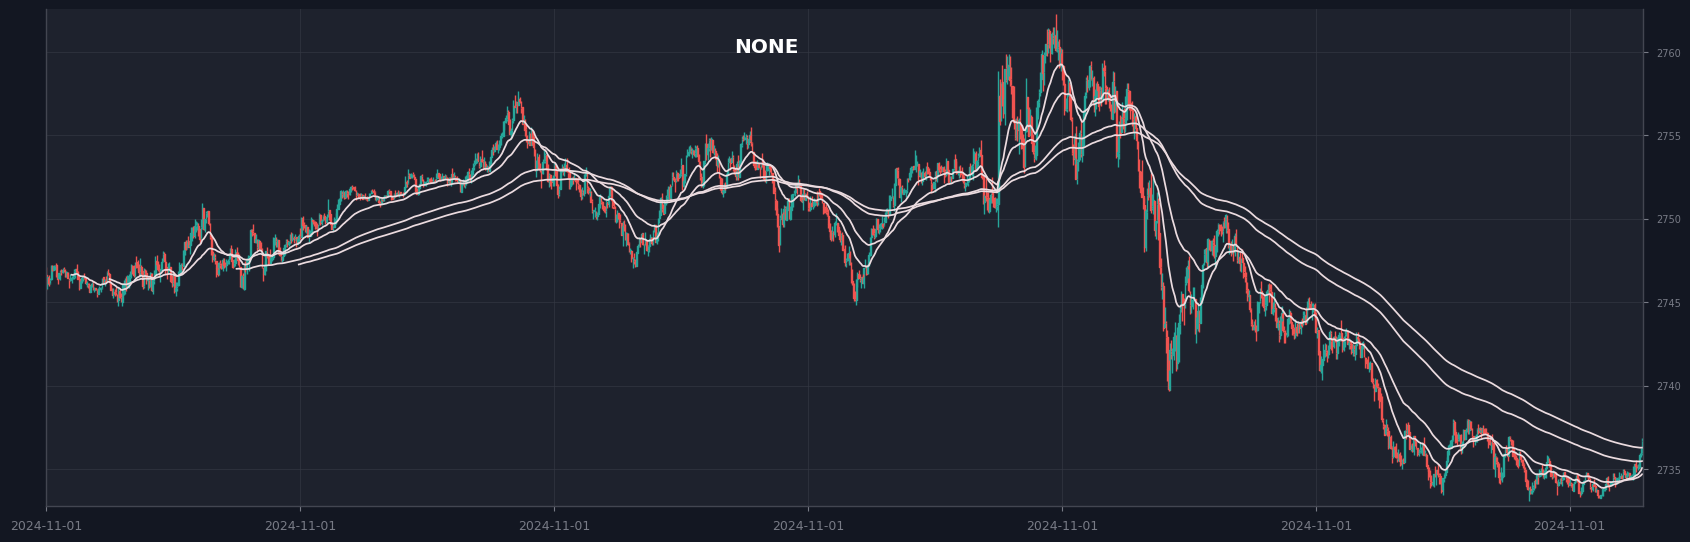

In [11]:
dta = resampled( df=df,timefrem='1min',startdate='2024-11-01',enddate='2024-11-02',resampler=resampler )

fig, axes =chartter.plot(
    dta,
    addplot=[
        # mpf.make_addplot(talib.EMA(dta['close'],timeperiod = 15), panel=0, color="#EBDBDF", ylabel='RSI'),
        mpf.make_addplot(talib.EMA(dta['close'],timeperiod = 21), panel=0, color="#EBDBDF", ylabel='RSI'),
        mpf.make_addplot(talib.EMA(dta['close'],timeperiod = 51), panel=0, color="#EBDBDF", ylabel='RSI'),
        mpf.make_addplot(talib.EMA(dta['close'],timeperiod = 151), panel=0, color="#EBDBDF", ylabel='RSI'),
        mpf.make_addplot(talib.EMA(dta['close'],timeperiod = 200), panel=0, color="#EBDBDF", ylabel='RSI')
    ],
    config=cnf,
    returnfig=True
)